## K Nearest Neighbour

## Objectives
- Train KNN models with different neighbor hyper-parameters
- Evaluate KNN models on classification tasks
- Tune the number of neighbors and find the optimized one for a    specific task


In [24]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Evaluation metrics related methods
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
rs = 123

In [26]:
# Ignore any deprecation warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [27]:
## Load and Explore the tumor sample dataset
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/tumor.csv"
tumor_df = pd.read_csv(dataset_url)

In [28]:
tumor_df.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [29]:
X = tumor_df.iloc[:,:-1]
y = tumor_df.iloc[:,-1:]

In [30]:
X.describe()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [31]:
y.value_counts(normalize=True)

Class
0        0.650073
1        0.349927
Name: proportion, dtype: float64

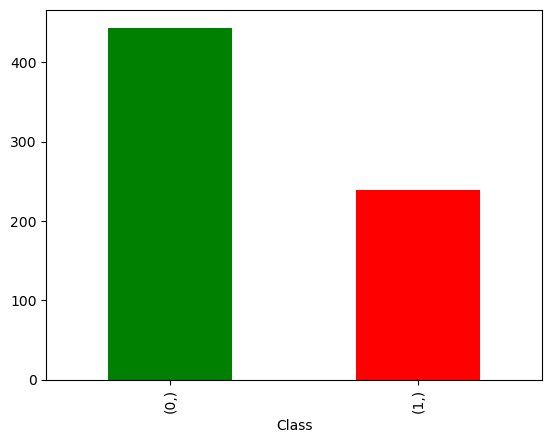

In [32]:
y.value_counts().plot.bar(color=['green', 'red'])
plt.show() 

## Split Training and Testing datasets

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size = 0.2, stratify = y, random_state=rs)

## Train and evaluate a KNN classifier with the number of neighbors set to 2

In [34]:
knn_model = KNeighborsClassifier(n_neighbors=2)

In [35]:
knn_model.fit(X_train, y_train.values.ravel())

,n_neighbors,2
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [36]:
preds = knn_model.predict(X_test)

In [37]:
def evaluate_metrics(yt,yp):
    results_pos = {}
    results_pos['accuracy']=accuracy_score(yt,yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt,yp, average = 'binary')
    results_pos['recall']= recall
    results_pos['precision']= precision
    results_pos['f1_score']= f_beta
    return results_pos

In [38]:
evaluate_metrics(y_test, preds)

{'accuracy': 0.9416058394160584,
 'recall': 0.875,
 'precision': 0.9545454545454546,
 'f1_score': 0.9130434782608695}

## Different Number of Neighbors

In [39]:
model= KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train.values.ravel())
preds = model.predict(X_test)
evaluate_metrics(y_test, preds)

{'accuracy': 0.9781021897810219,
 'recall': 0.9791666666666666,
 'precision': 0.9591836734693877,
 'f1_score': 0.9690721649484536}

In [40]:
max_k = 50
f1_scores = []

In [41]:
for k in range(1, max_k + 1):
    # Create a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Train the classifier
    knn = knn.fit(X_train, y_train.values.ravel())
    preds = knn.predict(X_test)
    # Evaluate the classifier with f1score
    f1 = f1_score(y_test, preds)
    f1_scores.append((k, round(f1, 4)))
# Convert the f1score list to a dataframe
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
f1_results.set_index('K', inplace=True)

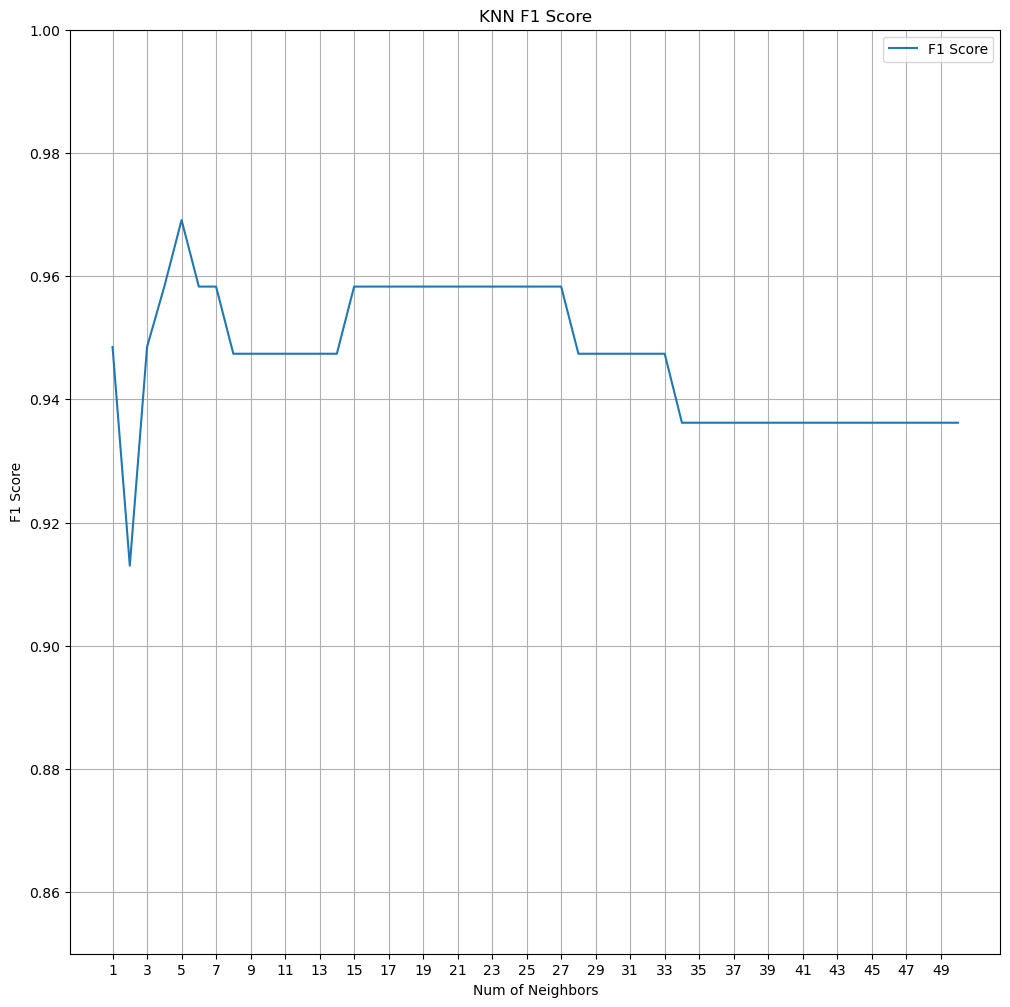

In [42]:
# Plot F1 results
ax = f1_results.plot(figsize=(12, 12))
ax.set(xlabel='Num of Neighbors', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.ylim((0.85, 1))
plt.title('KNN F1 Score')
plt.grid()
plt.show()